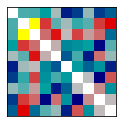

In [2]:
## Excerise 1 Data and RDM handling 

import numpy, rsatoolbox
data = rsatoolbox.data.Dataset(numpy.random.rand(10, 5))
rdms = rsatoolbox.rdm.calc_rdm(data)
rsatoolbox.vis.show_rdm(rdms)

import numpy as np
from scipy import io
import matplotlib.pyplot as plt
import rsatoolbox



In [6]:
# Load models 

matlab_data = io.matlab.loadmat('rsatoolbox/demos/rdms_inferring/modelRDMs_A2020.mat')
matlab_data = matlab_data['modelRDMs']
n_models = len(matlab_data[0])
model_names = [matlab_data[0][i][0][0] for i in range(n_models)]
measurement_model = [matlab_data[0][i][1][0] for i in range(n_models)]
rdms_array = np.array([matlab_data[0][i][3][0] for i in range(n_models)])

In [7]:
model_rdms = rsatoolbox.rdm.RDMs(rdms_array,
                            rdm_descriptors={'brain_computational_model':model_names,
                                             'measurement_model':measurement_model},
                            dissimilarity_measure='Euclidean'
                           )

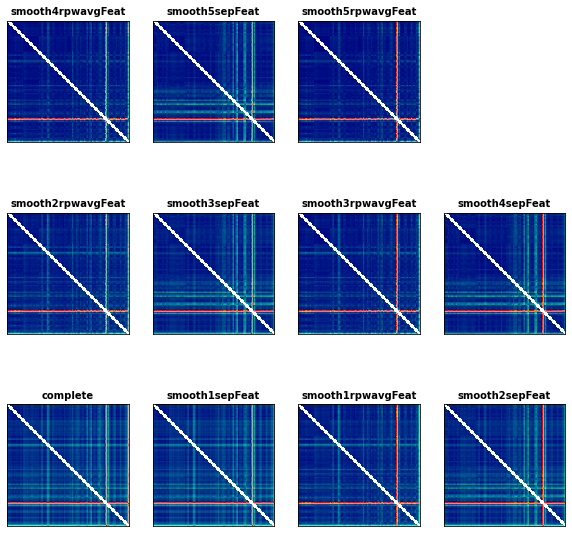

In [8]:
conv1_rdms = model_rdms.subset('brain_computational_model','conv1')
fig, ax, ret_val = rsatoolbox.vis.show_rdm(conv1_rdms, rdm_descriptor='measurement_model', figsize=(10,10))

In [9]:
conv1_rdms = model_rdms.subset('brain_computational_model','conv1')
print(conv1_rdms)

rsatoolbox.rdm.RDMs
11 RDM(s) over 92 conditions

dissimilarity_measure = 
Euclidean

dissimilarities[0] = 
[[0.00000000e+00 7.35978432e+08 5.35502528e+08 ... 1.34278669e+09
  1.34848320e+09 4.47360614e+09]
 [7.35978432e+08 0.00000000e+00 6.72164736e+08 ... 1.52816154e+09
  1.59405773e+09 4.56825293e+09]
 [5.35502528e+08 6.72164736e+08 0.00000000e+00 ... 1.40547021e+09
  1.39483494e+09 4.35671757e+09]
 ...
 [1.34278669e+09 1.52816154e+09 1.40547021e+09 ... 0.00000000e+00
  1.85234202e+09 4.90678682e+09]
 [1.34848320e+09 1.59405773e+09 1.39483494e+09 ... 1.85234202e+09
  0.00000000e+00 5.00813875e+09]
 [4.47360614e+09 4.56825293e+09 4.35671757e+09 ... 4.90678682e+09
  5.00813875e+09 0.00000000e+00]]

descriptors: 

rdm_descriptors: 
brain_computational_model = ['conv1', 'conv1', 'conv1', 'conv1', 'conv1', 'conv1', 'conv1', 'conv1', 'conv1', 'conv1', 'conv1']
measurement_model = ['complete', 'smooth1sepFeat', 'smooth1rpwavgFeat', 'smooth2sepFeat', 'smooth2rpwavgFeat', 'smooth3sepFeat', '

In [10]:
#Exercise 2: Fixed model inference

matlab_data = io.matlab.loadmat('rsatoolbox/demos/rdms_inferring/noisyModelRDMs_A2020.mat')
repr_names_matlab = matlab_data['reprNames']
fwhms_matlab = matlab_data['FWHMs']
noise_std_matlab = matlab_data['relNoiseStds']
rdms_matlab = matlab_data['noisyModelRDMs']
repr_names = [repr_names_matlab[i][0][0] for i in range(repr_names_matlab.shape[0])]
fwhms = fwhms_matlab.squeeze().astype('float')
noise_std = noise_std_matlab.squeeze().astype('float')
rdms_matrix = rdms_matlab.squeeze().astype('float')


The chosen ground truth model is:
conv3
with noise level:
3.0
with averaging width (full width at half magnitude):
0.0


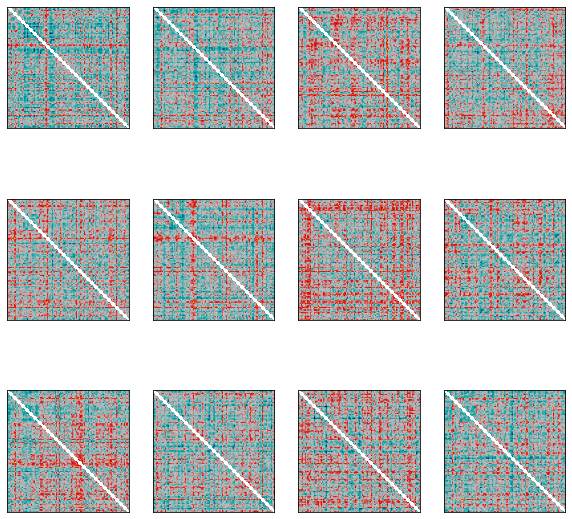

In [11]:
# indices choosing brain-computational model, noise level, and the size of the kernel with which each voxel samples the neural activity
i_rep = 2 #np.random.randint(len(repr_names))
i_noise = 1 #np.random.randint(len(noise_std))
i_fwhm = 0 #np.random.randint(len(fwhms))

# print the chosen representation definition
repr_name = repr_names[i_rep]
print('The chosen ground truth model is:')
print(repr_name)
print('with noise level:')
print(noise_std[i_noise])
print('with averaging width (full width at half magnitude):')
print(fwhms[i_fwhm])

# put the rdms into an RDMs object and show it
rdms_data = rsatoolbox.rdm.RDMs(rdms_matrix[:, i_rep, i_fwhm, i_noise, :].transpose())

fig, ax, ret_val = rsatoolbox.vis.show_rdm(rdms_data, figsize=(10,10))

In [12]:
# defin fixed models
models = []
for i_model in np.unique(model_names):
    rdm_m = model_rdms.subset('brain_computational_model', i_model).subset('measurement_model','complete')
    m = rsatoolbox.model.ModelFixed(i_model, rdm_m)
    models.append(m)

print('created the following models:')
for i in range(len(models)):
    print(models[i].name)

created the following models:
conv1
conv2
conv3
conv4
conv5
fc6
fc7
fc8
prob


In [13]:
# Compare models RDMs

rdms_data

rsatoolbox.rdm.RDMs(
dissimilarity_measure = 
None
dissimilarities = 
[[285.55175781 293.54159546 296.19104004 ... 298.66671753 291.25585938
  301.21057129]
 [294.75619507 303.51464844 295.31863403 ... 303.96090698 299.55621338
  303.85379028]
 [301.32626343 298.68527222 304.10681152 ... 283.83795166 294.56289673
  296.49880981]
 ...
 [318.25552368 310.40838623 298.58987427 ... 322.04980469 313.71170044
  295.81399536]
 [295.44503784 300.83560181 301.46896362 ... 293.57272339 308.70294189
  299.4274292 ]
 [316.66516113 303.19750977 295.99020386 ... 298.8821106  311.31036377
  303.92214966]]
descriptors = 
{}
rdm_descriptors = 
{'index': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]}
pattern_descriptors = 
{'index': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72,

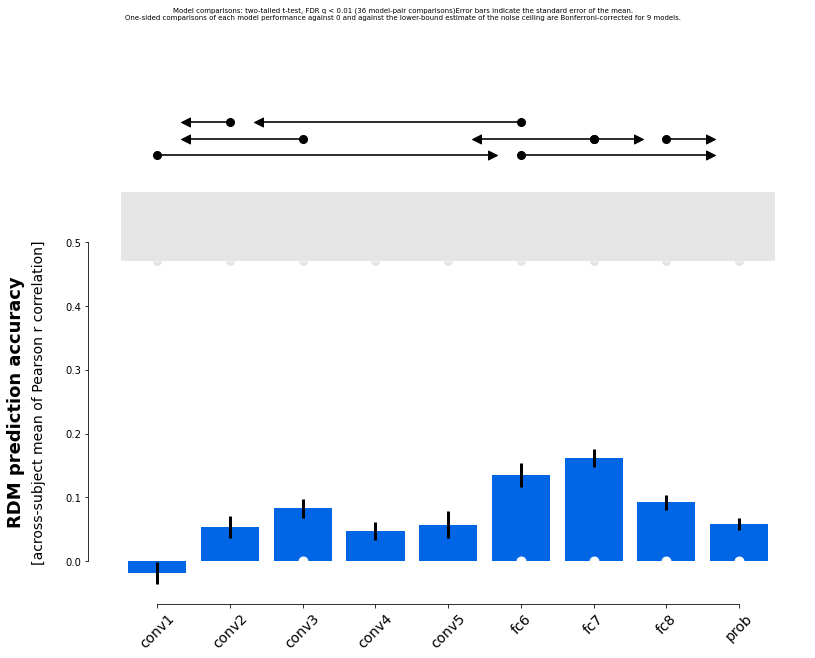

In [14]:
results_1 = rsatoolbox.inference.eval_fixed(models, rdms_data, method='corr')
rsatoolbox.vis.plot_model_comparison(results_1)

100%|██████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:31<00:00, 32.05it/s]


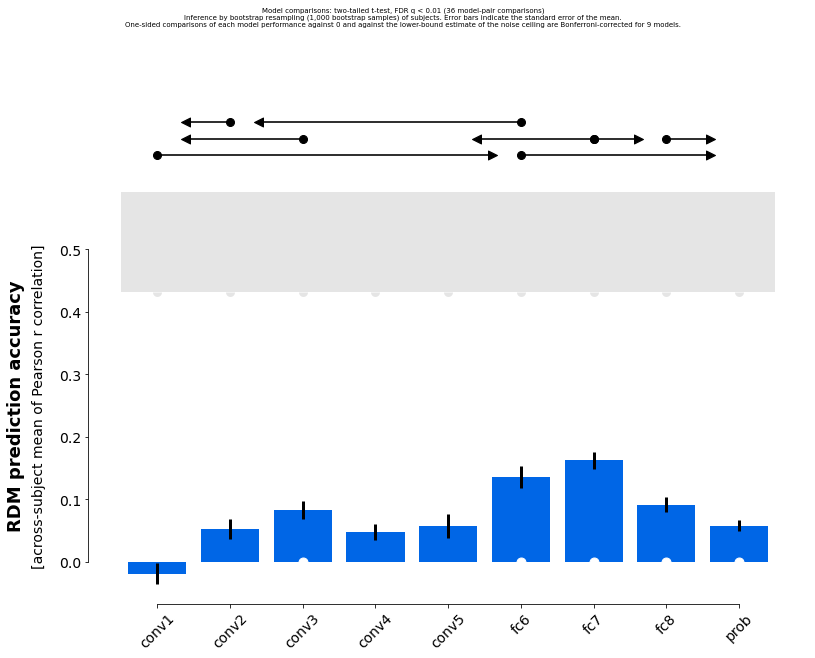

In [15]:
#Bootstrapping
results_2a = rsatoolbox.inference.eval_bootstrap_rdm(models, rdms_data, method='corr')
rsatoolbox.vis.plot_model_comparison(results_2a)

100%|██████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:47<00:00, 21.25it/s]


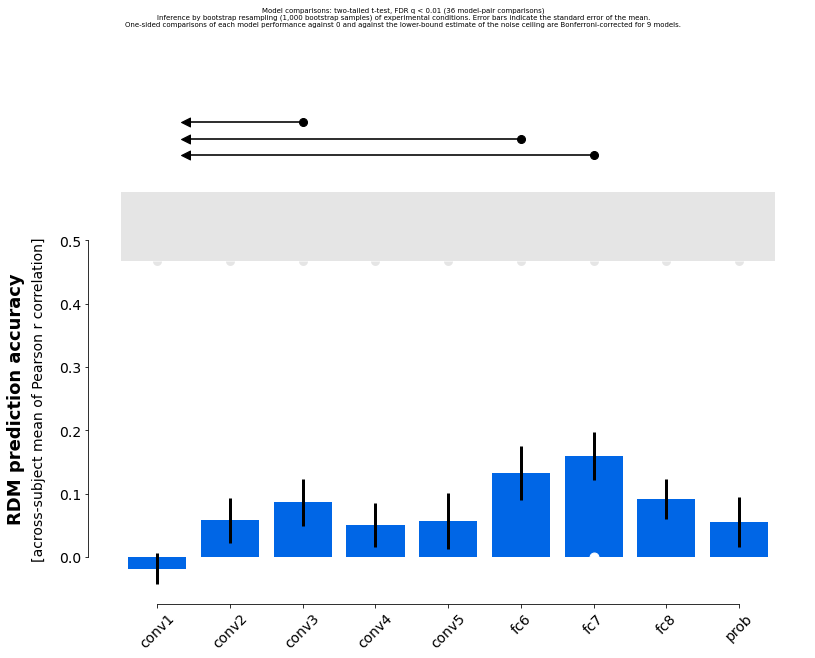

In [16]:
results_2b = rsatoolbox.inference.eval_bootstrap_pattern(models, rdms_data, method='corr')
rsatoolbox.vis.plot_model_comparison(results_2b)

100%|██████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:19<00:00, 51.20it/s]


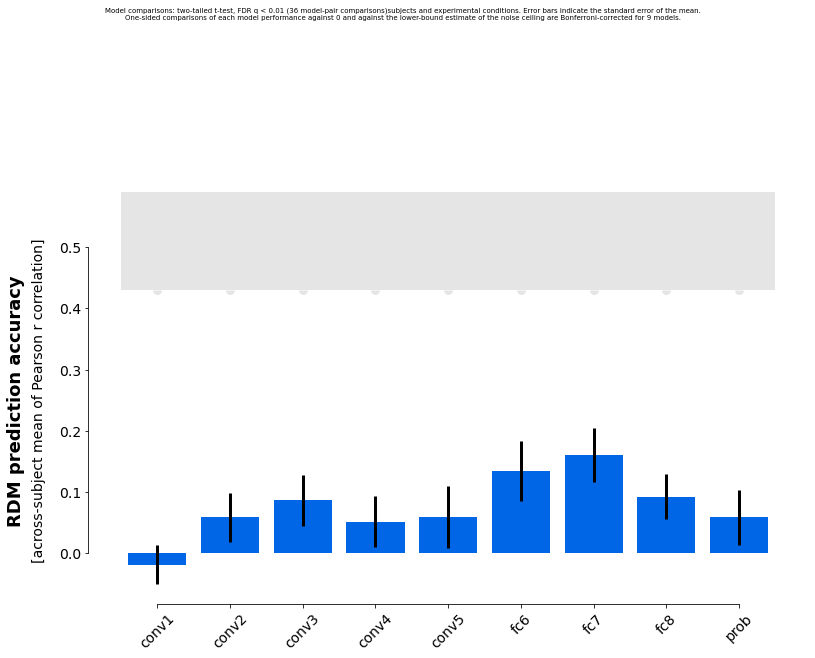

In [17]:
results_2c = rsatoolbox.inference.eval_bootstrap(models, rdms_data, method='corr')
rsatoolbox.vis.plot_model_comparison(results_2c)

In [18]:
# Exercise 3: Crossvalidation for flexible models

models_flex = []
for i_model in np.unique(model_names):
    models_flex.append(rsatoolbox.model.ModelSelect(i_model,
        model_rdms.subset('brain_computational_model', i_model)))

print('created the following models:')
for i in range(len(models_flex)):
    print(models_flex[i].name)

created the following models:
conv1
conv2
conv3
conv4
conv5
fc6
fc7
fc8
prob


In [19]:
# Cross Validation

train_set, test_set, ceil_set = rsatoolbox.inference.sets_k_fold(rdms_data, k_pattern=3, k_rdm=2)

C:\Users\ea472\anaconda3\lib\site-packages\rsatoolbox\vis\model_plot.py:224: UserWarning: tests deactivated as crossvalidation does notprovide uncertainty estimate
  warnings.warn('tests deactivated as crossvalidation does not'
C:\Users\ea472\anaconda3\lib\site-packages\rsatoolbox\vis\model_plot.py:230: UserWarning: errorbars deactivated as crossvalidation does notprovide uncertainty estimate
  warnings.warn('errorbars deactivated as crossvalidation does not'


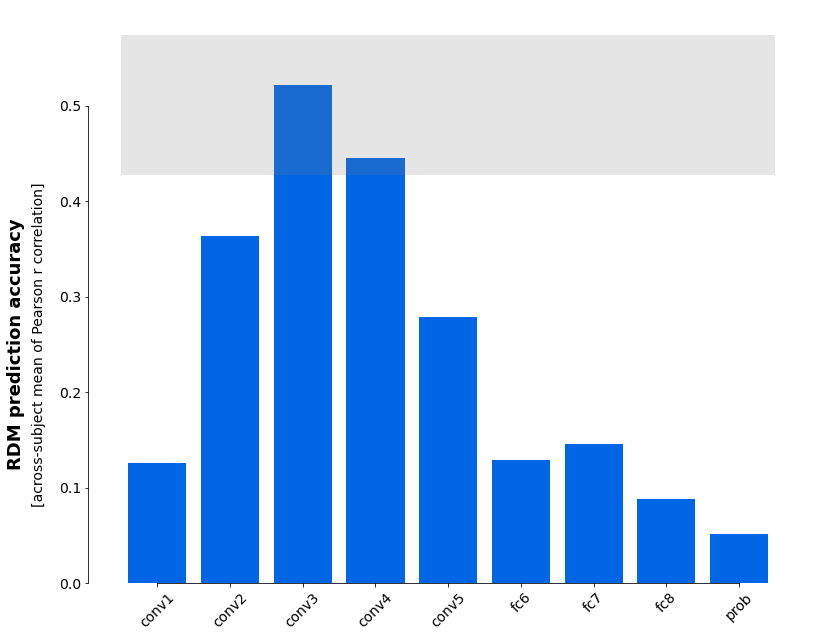

In [20]:
results_3_cv = rsatoolbox.inference.crossval(models_flex, rdms_data, train_set, test_set,
                                        ceil_set=ceil_set, method='corr')
# plot results
rsatoolbox.vis.plot_model_comparison(results_3_cv)

100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:57<00:00,  1.75it/s]


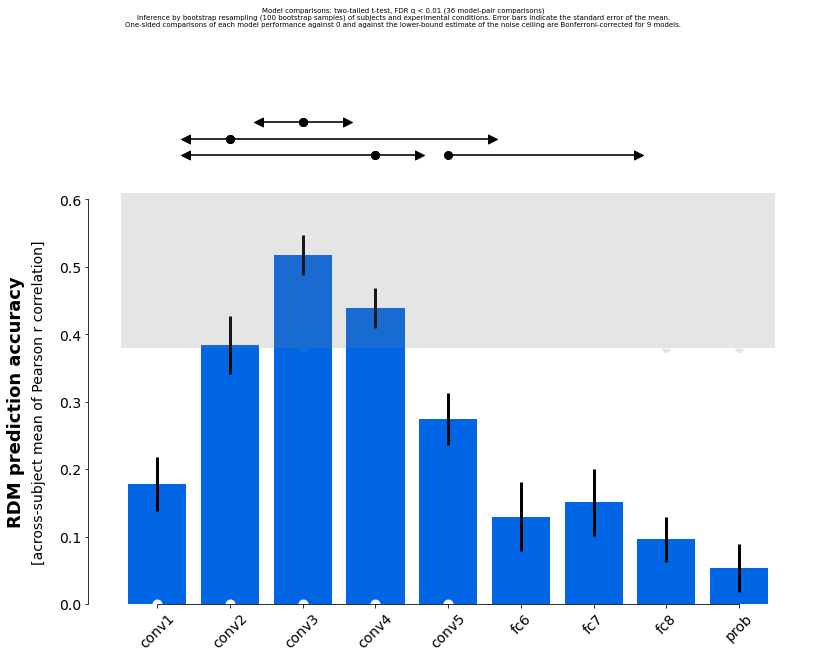

In [21]:
## Bootstrapping Crossvalidation
results_3_full = rsatoolbox.inference.bootstrap_crossval(models_flex, rdms_data, k_pattern=4, k_rdm=2, method='corr', N=100)
# plot results
rsatoolbox.vis.plot_model_comparison(results_3_full)